# Exploring and Preparing Data

- Falcon 9 first stage will land successfully

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

- Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)



## Exploratory Data Analysis

In [4]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')

In [5]:
# read the data
data = pd.read_csv('dataset_part_1.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### let's try to see how the FlightNumber and Payload variables would affect the launch number


<Figure size 1400x800 with 0 Axes>

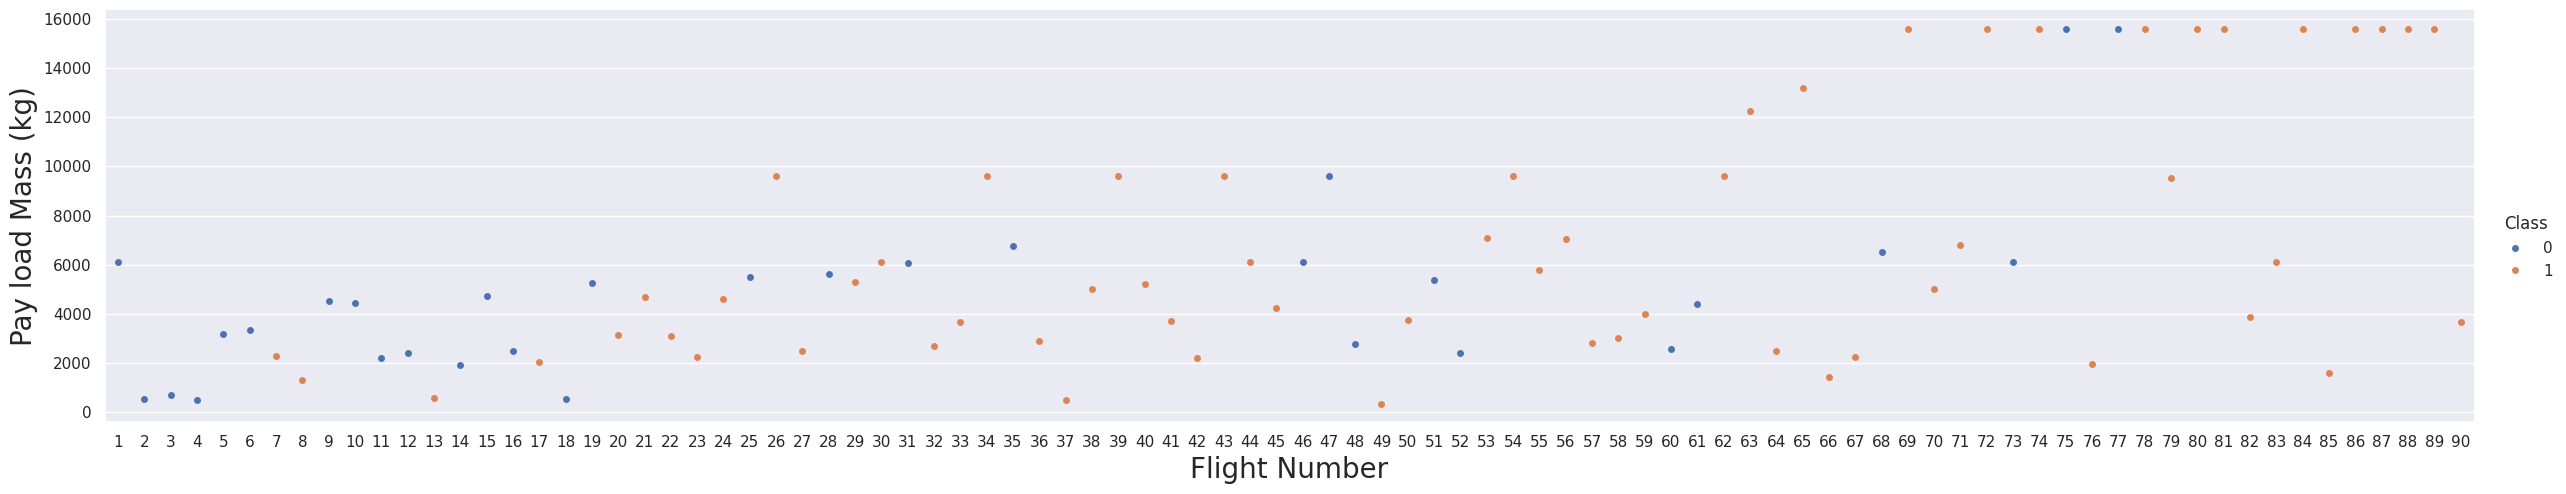

In [16]:
sns.set_theme(color_codes = True)
plt.figure(figsize = (14,8))
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = data, aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)
plt.show()

### let's try to see how the FlightNumber and LaunchSite variables would affect the launch number


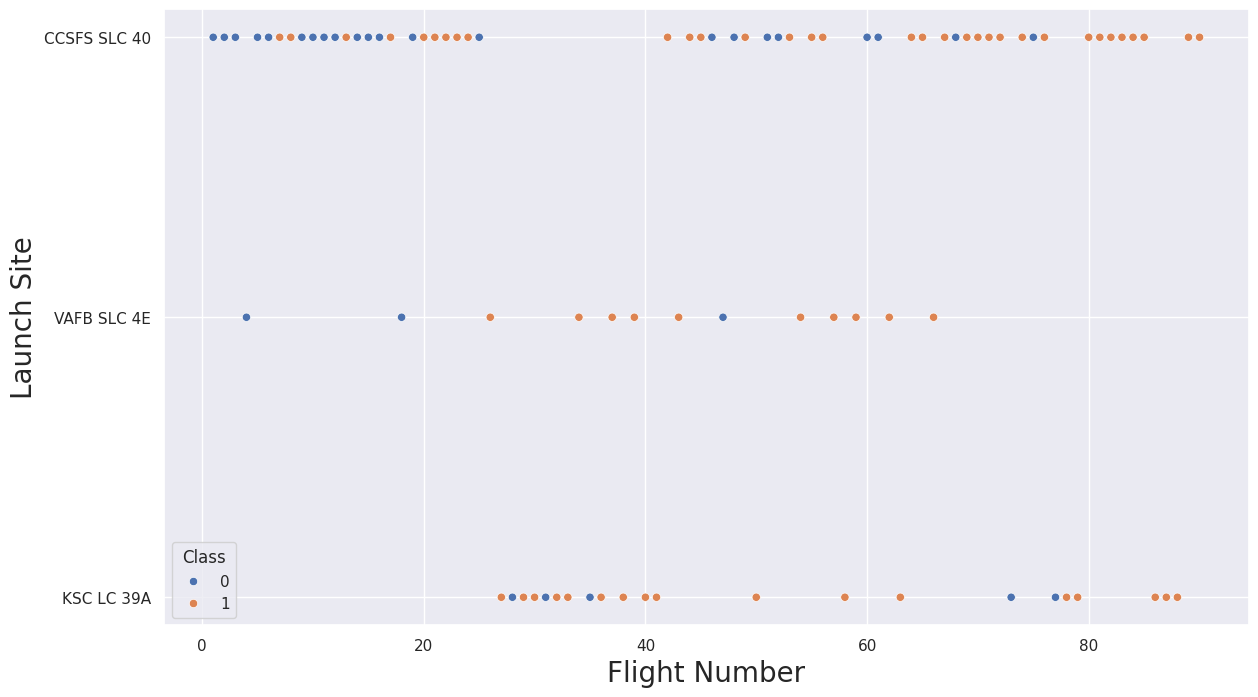

In [13]:
sns.set_theme(color_codes = True)
plt.figure(figsize = (14,8))
sns.scatterplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = data)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Launch Site",fontsize = 20)
plt.show()

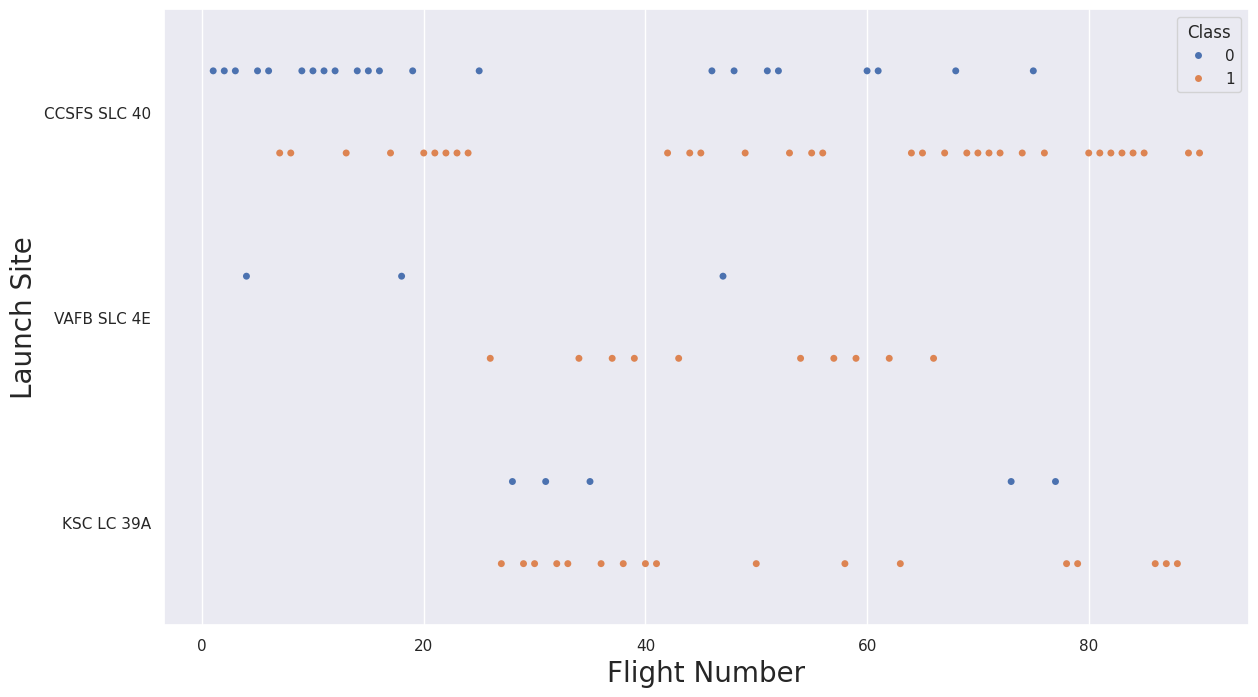

In [15]:
# we will use the swarm plot instead of scatter plot , swarm plots seem very useful in those cases
sns.set_theme(color_codes = True)
plt.figure(figsize = (14,8))
sns.swarmplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = data, dodge = True)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Launch Site",fontsize = 20)
plt.show()

###  Visualize the relationship between Payload and Launch Site


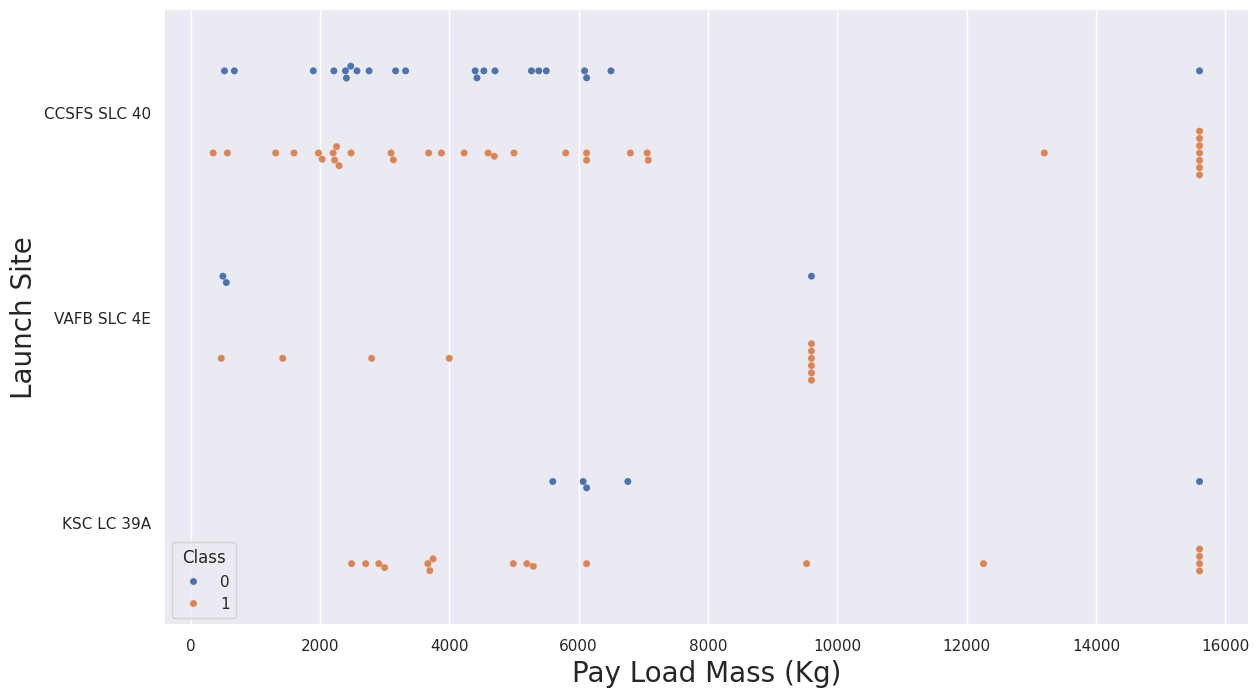

In [18]:
sns.set_theme(color_codes = True)
plt.figure(figsize = (14,8))
sns.swarmplot(x = "PayloadMass", y = "LaunchSite", hue = "Class", data = data, dodge = True)
plt.xlabel("Pay Load Mass (Kg)",fontsize = 20)
plt.ylabel("Launch Site",fontsize = 20)
plt.show()

### Visualize the relationship between success rate of each orbit type


Text(0, 0.5, 'Sucess rate of each orbit')

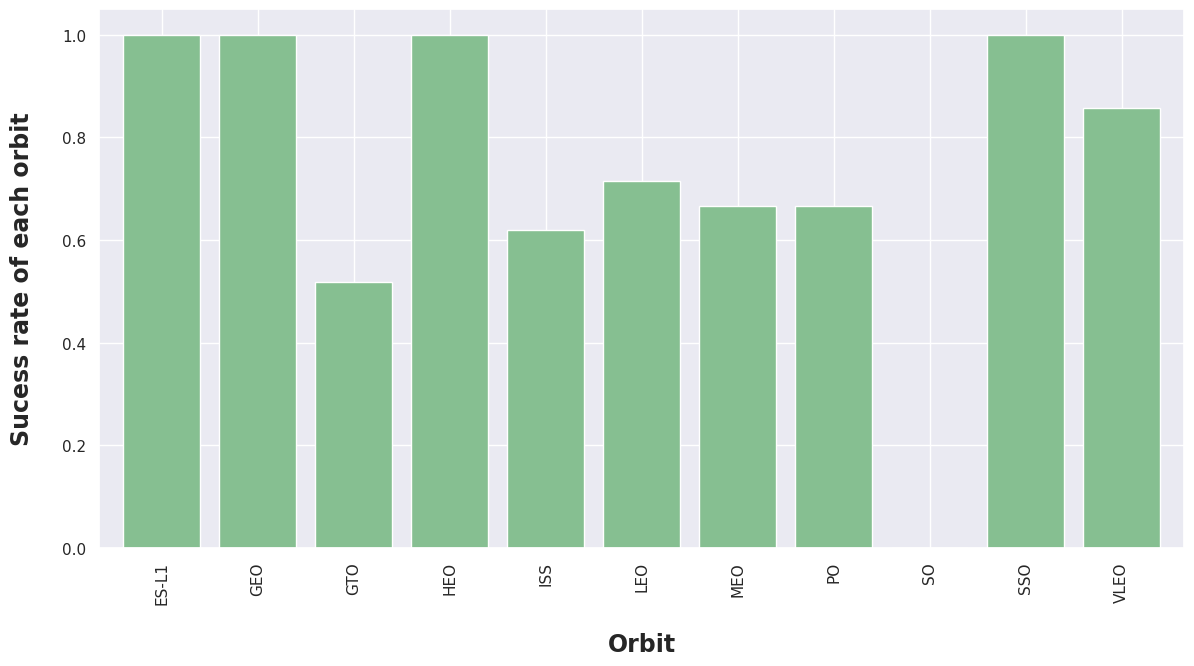

In [25]:
xh = data.groupby('Orbit')['Class'].mean()
ax = xh.plot(kind = 'bar', figsize = (14, 7), color = '#86bf91', zorder = 2, width = 0.8)
ax.set_xlabel("Orbit", labelpad = 20, weight = 'bold', size = 17)
ax.set_ylabel("Sucess rate of each orbit", labelpad = 20, weight = 'bold', size = 17)

### Visualize the relationship between FlightNumber and Orbit type


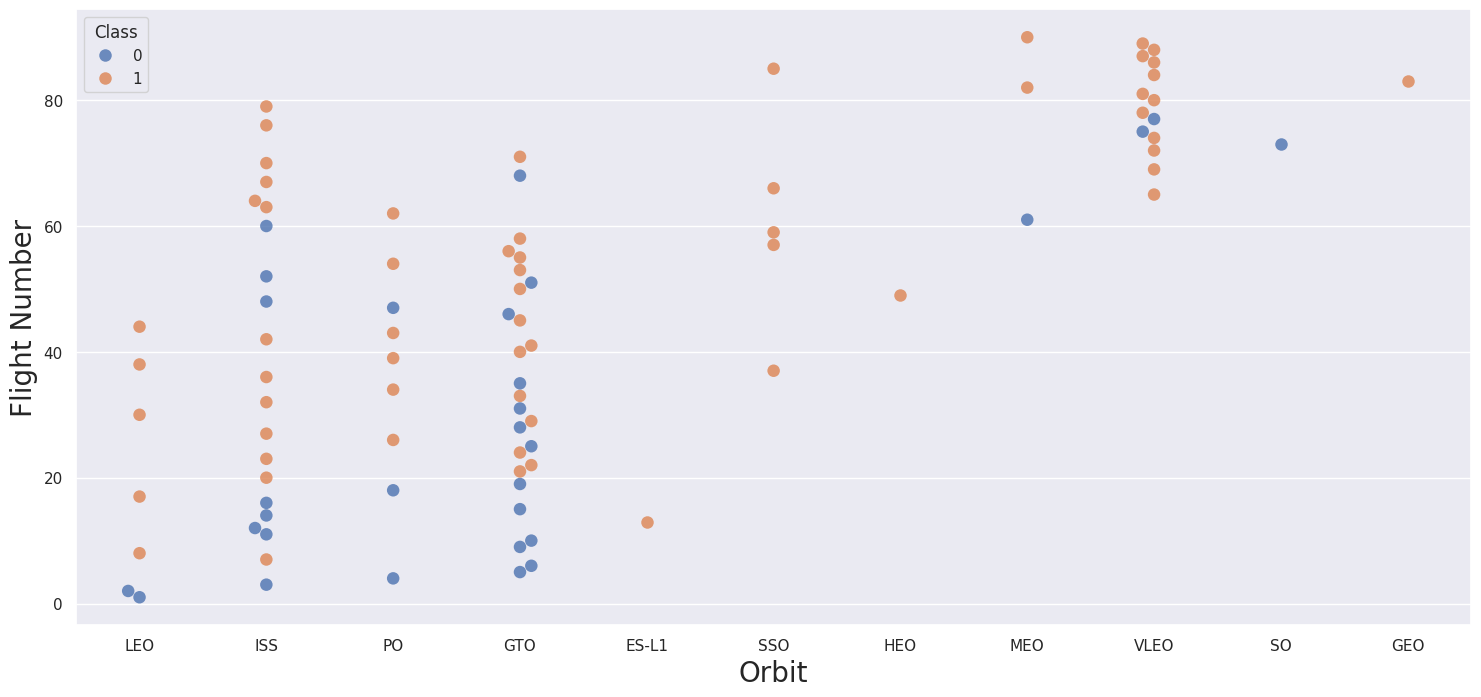

In [28]:
sns.set_theme(color_codes = True)
plt.figure(figsize = (18,8))
sns.swarmplot(x = "Orbit", y = "FlightNumber", hue = "Class", data = data, dodge = False, alpha = .8, size = 9)
plt.xlabel("Orbit",fontsize = 20)
plt.ylabel("Flight Number",fontsize = 20)
plt.show()

### Visualize the relationship between Payload and Orbit type


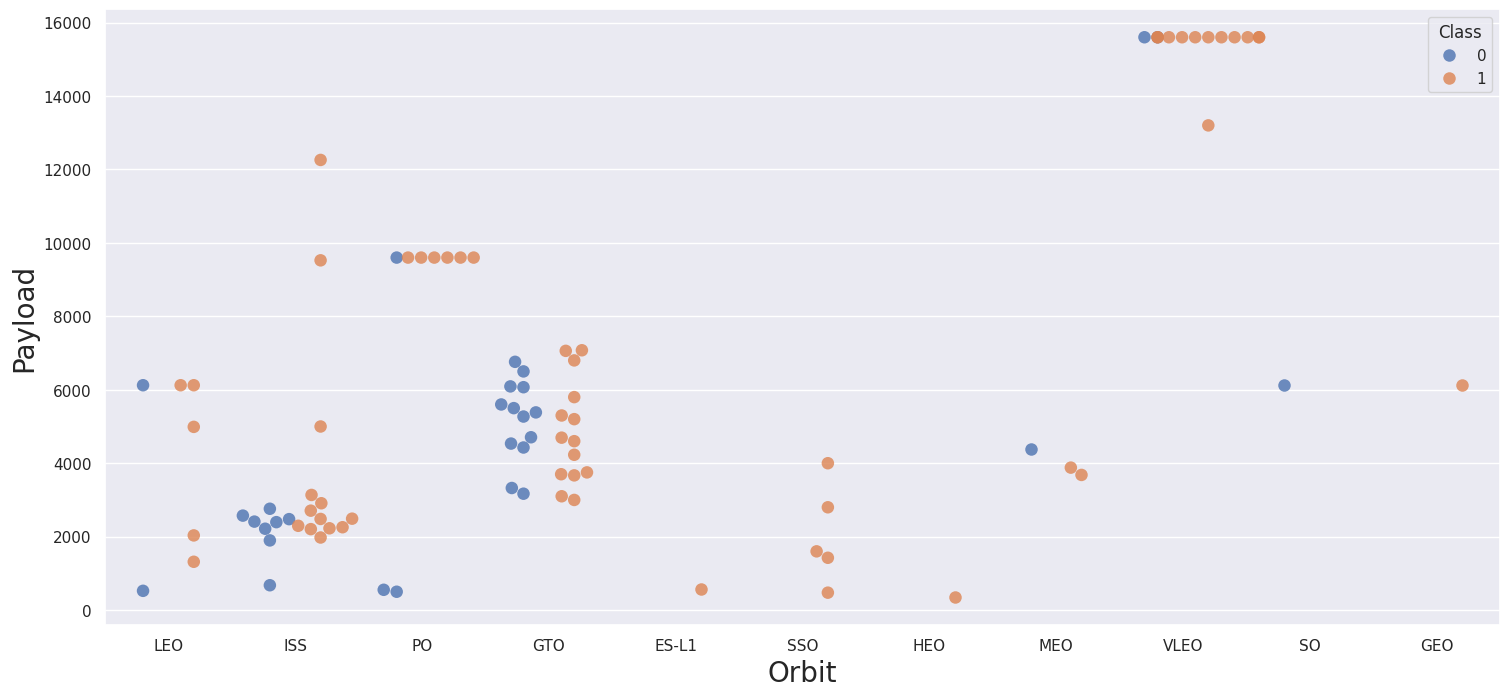

In [30]:
sns.set_theme(color_codes = True)
plt.figure(figsize = (18,8))
sns.swarmplot(x = "Orbit", y = "PayloadMass", hue = "Class", data = data, dodge = True, alpha = .8, size = 9)
plt.xlabel("Orbit",fontsize = 20)
plt.ylabel("Payload",fontsize = 20)
plt.show()

### Visualize the launch success yearly trend


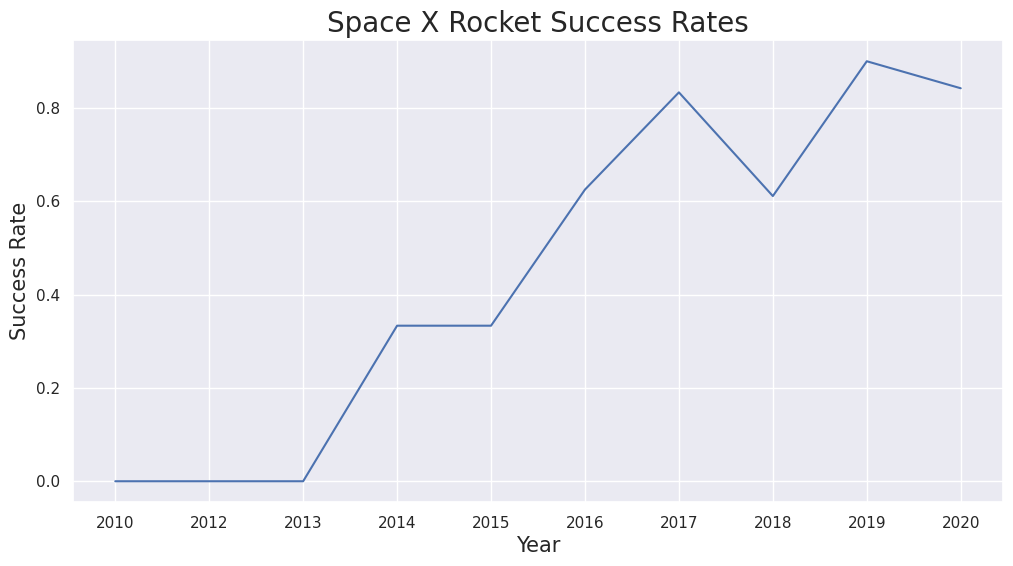

In [38]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
data['Date'] = year

df_groupby_year = data.groupby("Date", as_index = False)["Class"].mean()
sns.set(rc = {'figure.figsize': (12,6)})
sns.lineplot(data = df_groupby_year, x = "Date", y = "Class" )
plt.xlabel("Year", fontsize = 15)
plt.title('Space X Rocket Success Rates', fontsize = 20)
plt.ylabel("Success Rate",fontsize = 15)
plt.show()

## Features Engineering

In [39]:
# we will select the features that will be used in success prediction in the future module.
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [40]:
# Create dummy variables to categorical columns
features_one_hot = features

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(data['Orbit'])],axis=1)
features_one_hot.drop(['Orbit'], axis = 1, inplace = True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(data['LaunchSite'])],axis=1)
features_one_hot.drop(['LaunchSite'], axis = 1, inplace = True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(data['LandingPad'])],axis=1)
features_one_hot.drop(['LandingPad'], axis = 1, inplace = True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(data['Serial'])],axis=1)
features_one_hot.drop(['Serial'], axis = 1, inplace = True)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)
features_one_hot.sample()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
30,31.0,6070.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
features_one_hot.to_csv('dataset_part_2.csv', index=False)